# Multi-Layer Perceptron (MLP)

## 1. Why Linear Stacking Alone is Not Enough

### Learning Objectives:
- Understand what happens when we stack multiple linear transformations
- Revisit the core limitation of linear models
- Build motivation for using non-linear activation functions

### Revisiting Linear Models

Recall from earlier notebooks:
A **linear model** makes predictions using the rule:

$$
\hat{y} = W X + b
$$

Where:
- $X$ is the input feature vector (e.g., size $n \times d$)
- $W$ is a weight matrix
- $b$ is a bias term

This computes a weighted sum of the input features — a straight line (or hyperplane in higher dimensions).


### What Happens If We Stack Linears?

Suppose we apply **two linear layers** one after another (no activation in between):

$$
\begin{align*}
  h &= W_1 X + b_1 \\
  \hat{y} &= W_2 h + b_2
\end{align*}
$$

Substitute $h$ into the second equation:

$$
\hat{y} = W_2 (W_1 X + b_1) + b_2 = (W_2 W_1) X + (W_2 b_1 + b_2)
$$

✅ This is **still a linear transformation** from $X$ to $\hat{y}$ — we’ve just combined the matrices.


### ❗ Key Insight
> Stacking multiple linear layers **without activation functions** is equivalent to a **single linear layer**.

🔸 No matter how deep the stack goes, the overall transformation is still a **straight line** in input space.

🔸 Therefore, such a model **cannot capture nonlinear patterns** — like curves, circles, XOR logic, or real-world physical interactions.


### 🧭 Why This Matters
This is the main reason we introduce **non-linear activation functions** between layers — to break the linearity and allow our models to capture rich, curved, and complex relationships.

➡️ We’ll explore this further in the next sections by revisiting **activation functions** and then **training MLPs** on real data.


### 💡 Recap Flow (Schematic):

```text
X (input features)
   ↓ Linear(W1, b1)
   h (still linear)
   ↓ Linear(W2, b2)
   ⇒ Still linear overall
```
We need something nonlinear in between!

---


## 2. What Are Hyperparameters?

In deep learning, we train models by adjusting internal weights and biases — these are called **parameters**.  
But there’s another kind of setting that **we must choose ourselves before training begins**:  
those are called **hyperparameters**.

### Definition

✅ **Hyperparameters** are configuration values **not learned** from data.  
We define them **before training** to control how the model behaves and learns.

These choices greatly affect:
- How fast the model learns 🐢⚡
- Whether it overfits or underfits the data 🎯
- How well it generalizes to new data 🌍

### Common Hyperparameters (Cheat Sheet)

| Hyperparameter             | What It Controls                                      | Typical Values      |
|----------------------------|--------------------------------------------------------|---------------------|
| **Learning Rate** (`lr`)  | How big a step we take to update weights               | 0.001 to 0.1        |
| **Number of Epochs**       | How many times we loop through the training set        | 100, 300, 1000+     |
| **Hidden Layer Size**      | How many neurons in each hidden layer                  | 16, 32, 64, ...     |
| **Number of Hidden Layers**| Depth of the network (1 layer? 2? more?)               | 1–3 (or more)       |
| **Batch Size**             | How many samples we use to compute gradients           | 16, 32, 64, 128     |
| **Activation Function**    | The non-linearity we apply (ReLU, Tanh, Sigmoid, etc.) | ReLU (common)       |
| **Optimizer**              | Algorithm for adjusting parameters                     | SGD, Adam, RMSprop  |

> ✅ These are like "knobs" we turn to tune our learning system.


### Why Do Hyperparameters Matter?

Even a great model architecture can perform poorly if the hyperparameters are poorly chosen.

- Too large a learning rate? ❌ Model never converges.
- Too few epochs? ❌ Model underfits.
- Too small hidden layer? ❌ Can’t capture patterns.
- Wrong activation? ❌ Poor gradient flow.

✅ Good hyperparameters make the **same model perform much better.**

Now that we know how important hyperparameters are,  
let’s build an actual MLP (Multi-Layer Perceptron) —  
first using PyTorch’s quick `nn.Sequential`, and then with a custom class using `nn.Module`.

---


## 3. Building a Multi-Layer Perceptron (MLP) Using `nn.Sequential`

Now that we understand the role of **activation functions** and **hyperparameters**,  
let’s start building real neural networks — starting with a classic: the **MLP**.


### What is a Multi-Layer Perceptron (MLP)?

An **MLP** is a type of neural network with:

- One or more **hidden layers**
- Each layer performs a **linear transformation** followed by a **non-linear activation**
- A final **output layer** makes predictions


### Structure (for regression):

### 🧠 Simple Neural Network Architecture

**Inputs** (8 features from dataset)  
⬇️  
**Linear Layer** (8 → 16)  
⬇️  
**ReLU Activation**  
⬇️  
**Linear Layer** (16 → 1)  
⬇️  
**Output:** Predicted concrete strength



Mathematically:


\begin{aligned}
h &= \text{ReLU}(W_1 X + b_1) \\
\hat{y} &= W_2 h + b_2
\end{aligned}


✅ This combination of linear + non-linear steps enables the model to **learn complex patterns**.


### PyTorch Tool: `nn.Sequential`

We’ll use `nn.Sequential` — a convenient PyTorch container to **stack layers** in order.

```python
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(input_size, hidden_size),  # Layer 1
    nn.ReLU(),                           # Activation
    nn.Linear(hidden_size, output_size)  # Output layer
)
```


### Explanation:

- `nn.Linear(a, b)`: Linear layer mapping from **a-dimensional input** to **b-dimensional output**  
- `nn.ReLU()`: Applies the **ReLU activation function** element-wise:  
  $$
  \text{ReLU}(x) = \max(0, x)
  $$


### Code Demo: Simple MLP for Concrete Dataset

We’ll build a simple **Multi-Layer Perceptron (MLP)** with:

- **Input size** = 8 features  
- **Hidden size** = 16 neurons  
- **Output size** = 1 value (predicted strength)


In [1]:
import torch
import torch.nn as nn

input_size = 8
hidden_size = 16
outcome_size = 1

simple_mlp = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, outcome_size)
)

print(simple_mlp)

Sequential(
  (0): Linear(in_features=8, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
)


## 4. Building a Custom MLP using `nn.Module`

### Why Use a Custom Class for an MLP?

While `nn.Sequential` is a great shortcut for prototyping models, in most real-world scenarios we define our models using **custom classes**. This provides:

- Greater flexibility and control over architecture  
- Easier debugging and extension  
- More expressive forward passes

### 🔍 What's the Structure of a Custom Neural Network?

In PyTorch, we define a model by creating a class that:

- Inherits from `nn.Module`  
- Defines the layers in the `__init__()` method  
- Describes the forward pass in a `forward()` method

Basic structure:

```python
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        # define layers

    def forward(self, x):
        # apply layers to input x
        return output
```

Let’s see how this works using a concrete example.


### Basic MLP Using Custom Class (1 Hidden Layer)

We’ll define a model with:

- 8 input features (Concrete dataset)  
- 1 hidden layer with **16 neurons** and **ReLU activation**  
- 1 output neuron for **regression**

🖥️ **Code Cell:** Simple MLP with One Hidden Layer


In [2]:
import torch
import torch.nn as nn

# Custom MLP class for regression
class ConcreteMLP(nn.Module):
    def __init__(self, input_size=9, hidden_size=18, output_size=1):
        super(ConcreteMLP, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size)  # First hidden layer
        self.relu = nn.ReLU()                          # Activation
        self.fc2 = nn.Linear(hidden_size, output_size) # Output layer
    
    def forward(self, x):
        x = self.fc1(x)   # Apply first linear layer
        x = self.relu(x)  # Apply ReLU activation
        x = self.fc2(x)   # Apply output layer
        return x

# Create model instance
model = ConcreteMLP()
print(model)


ConcreteMLP(
  (fc1): Linear(in_features=9, out_features=18, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=18, out_features=1, bias=True)
)


Input (8)  
↓  
Linear (8 → 32)  
↓  
ReLU  
↓  
Linear (32 → 16)  
↓  
ReLU  
↓  
Linear (16 → 1)  
↓  
Output (Concrete Strength)


🖥️ MLP with Two Hidden Layers

In [3]:
class DeeperConcreteMLP(nn.Module):
    def __init__(self):
        super(DeeperConcreteMLP, self).__init__()
        self.fc1 = nn.Linear(8, 32)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(16, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x
    
# Create and print the model
model = DeeperConcreteMLP()
print(model)


DeeperConcreteMLP(
  (fc1): Linear(in_features=8, out_features=32, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)


✅ Key Takeaways

- Defining models as Python classes gives us flexibility.

- We can control layer connectivity, reuse components, and extend logic.

- We'll use this custom MLP when training on the Concrete dataset in upcoming sections.

---

### ✅ Code Task 1.4.4.1 – Build a Custom Deep MLP Using `nn.Module`

Your task is to define a deep neural network using PyTorch’s object-oriented approach (`nn.Module`).

You must:

1. Create a class named `CustomMLPModel` that inherits from `nn.Module`.

2. Inside the `__init__` method, define the following architecture:
   - A linear layer from 6 input features to 24 hidden units  
   - A ReLU activation  
   - A second linear layer from 24 to 12 hidden units  
   - Another ReLU activation  
   - A final linear layer from 12 to 1 output

3. Implement the `forward(self, x)` method to pass the input through each layer in the correct order.

4. Instantiate the model and assign it to a variable named `custom_model`.

5. Print the model to verify the structure.

✅ Make sure the layer dimensions and naming are exactly as specified above.

In [4]:
class CustomMLPModel(nn.Module):
    def __init__(self):
        super(CustomMLPModel, self).__init__()
        self.fc1 = nn.Linear(6, 24)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(24, 12)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(12, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

model = CustomMLPModel()
print(model)

CustomMLPModel(
  (fc1): Linear(in_features=6, out_features=24, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=24, out_features=12, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=12, out_features=1, bias=True)
)


## 5. Preparing the Concrete Dataset

### Overview: Why Data Preparation Matters

Before we train our neural network, we must carefully prepare the dataset. Good data preparation improves learning efficiency and model performance. This process includes:

- Loading the dataset
- Separating inputs and targets
- **Standardizing** the inputs (important!)
- Splitting into training and testing sets

We'll work with the **Concrete Compressive Strength** dataset — a real-world regression dataset.


### 🔹 What Is Standardization and Why Do We Need It?

In this dataset:
- Some features (e.g., cement) can be over 500
- Others (e.g., superplasticizer) are often less than 10

These differing **scales** can cause problems during training:
- Gradients may become unstable
- The optimizer may struggle to converge

To solve this, we apply **standardization**:

$$
X_{\text{standardized}} = \frac{X - \mu}{\sigma}
$$

Where:
- $\mu$ = mean of the feature
- $\sigma$ = standard deviation

This transforms each feature to have:
- Mean = 0
- Standard deviation = 1


### 🔹 Train/Test Split

To evaluate how well the model generalizes to **unseen data**, we split the data:

- **Training Set (80%)**: Model learns from this
- **Test Set (20%)**: Model is evaluated here

We shuffle before splitting to avoid bias.


### 🖥️ Code: Prepare the Concrete Dataset

In [5]:
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler

# read dataset
data = pd.read_csv('Project.csv')

# get predictors and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

scaler = StandardScaler()
scaled_input = scaler.fit_transform(X)

# transform into torch tensors
X_tensor = torch.tensor(scaled_input, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

torch.manual_seed(42)
n_samples = X.shape[0]
indices = torch.randperm(n_samples)

split_idx = int(n_samples * 0.8)
train_idx = indices[:split_idx]
test_idx = indices[split_idx:]

# Create splits
X_train = X_tensor[train_idx]
y_train = y_tensor[train_idx]
X_test = X_tensor[test_idx]
y_test = y_tensor[test_idx]

# Print shapes
print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape[0])

Training samples: torch.Size([824, 9])
Testing samples: 206



### 🔹 Summary of Preparation Steps

| Step              | Action                          |
|------------------|----------------------------------|
| Load             | CSV with 8 features + target     |
| Separate         | Inputs (X) and output (y)        |
| Standardize      | Use sklearn StandardScaler       |
| Tensor conversion| For PyTorch training             |
| Shuffle & split  | 80% training / 20% testing       |

We are now ready to **train the model**!

---

## 6. Training the MLP Model

### The Training Pipeline — Step-by-Step

Once we have our data and model ready, we move to the **core engine** of deep learning: training.

### What Does Training Involve?

Each epoch (a full pass over training data) performs the following:

1. **Forward Pass** – The model makes predictions for the training inputs.
2. **Loss Computation** – The model compares predictions to ground truth and calculates error.
3. **Backward Pass** – The gradients of the loss with respect to model parameters are computed.
4. **Optimization Step** – Parameters are updated to reduce the loss.
5. **Zeroing Gradients** – Gradients from the previous step are cleared (crucial in PyTorch).

This is repeated across **many epochs**, so the model gradually learns.

### 🧠 Conceptual Flow

```text
X_train 
   ↓
Forward Pass  →  Compute Predictions \hat{y}
   ↓
Loss Function →  Compare (\hat{y}, y_train)
   ↓
Backward Pass →  Compute Gradients
   ↓
Optimizer Step →  Update Weights
   ↓
Zero Gradients  →  Prepare for next epoch
```


### Code: Setup Loss and Optimizer

We’ll use:
- `nn.MSELoss()` — Mean Squared Error Loss
- `torch.optim.Adam()` — A popular adaptive optimizer

In [6]:
import torch.optim as optim

model = ConcreteMLP()


loss_fn = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)
print(model)
print(optimizer)

ConcreteMLP(
  (fc1): Linear(in_features=9, out_features=18, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=18, out_features=1, bias=True)
)
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


###  Writing the Training Loop

We now implement the full training pipeline.
We will:
- Train the model for 300 epochs
- Print the loss every 50 epochs
- Track the loss over time for visualization in Section 7

In [9]:
# number of epochs
epochs = 300

# train losses
train_losses = []

for epoch in range(epochs):
    y_train_pred = model(X_train)

    # calculate loss
    loss = loss_fn(y_train_pred, y_train)
    train_losses.append(loss.item())

    # Backward propagation
    loss.backward()

    # Updating parameters
    optimizer.step()

    # Zeroing parameters
    optimizer.zero_grad()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [50/300], Loss: 110.3414
Epoch [100/300], Loss: 106.6550
Epoch [150/300], Loss: 103.7230
Epoch [200/300], Loss: 101.0909
Epoch [250/300], Loss: 99.2509
Epoch [300/300], Loss: 97.6975


### ✅ Summary: What We've Built

| Step               | Function                           |
|--------------------|------------------------------------|
| Loss Function      | Measures prediction error          |
| Optimizer          | Updates model weights              |
| Training Loop      | Runs the training process          |
| Epochs             | Controls training duration         |
| Zeroing Gradients  | Prevents gradient accumulation     |

This setup forms the **foundation of any neural network training** in PyTorch — scalable from toy models to industrial-scale networks.

➡️ In the next section, we’ll **visualize the loss curve** to verify our model is actually learning.

---

## 7. Visualizing Training Loss

### Why Visualize the Loss?

Once our model has been trained, it’s essential to **visualize how the loss changed over time**. This provides insight into how well the model is learning.


### 🔍 What can the loss curve tell us?

| Pattern in Loss Curve         | Interpretation                          |
|------------------------------|------------------------------------------|
| Decreasing smoothly          | ✅ Model is learning properly             |
| Flat or constant             | ⚠️ Might not be learning at all           |
| Increasing                   | ❌ Something is wrong (learning rate too high?) |
| Noisy and erratic            | ⚠️ Could be unstable training              |

A smooth downward curve suggests the model is improving. A bumpy or flat curve might require us to revise the learning rate or model structure.

### 🧠 Mental Schematic: How We Got Here

```text
X_train ──▶ MLP Model ──▶ Predictions (ŷ) ──▶ Compare with y_train ──▶ Compute Loss (MSE)
                                     ▲                                       │
                                     │                                       ▼
                      Update Weights using Optimizer ◀── Backpropagation ◀── .backward()
```

Over many epochs, this loop should drive the loss **down**.

Let’s visualize this now.


### Plotting the Loss Curve

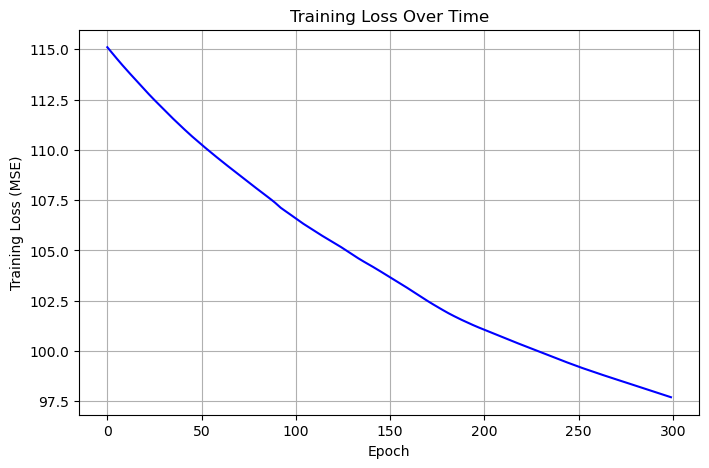

In [10]:
import matplotlib.pyplot as plt

# Plot the training loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), train_losses, linestyle='-', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Training Loss (MSE)')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()

### 🔍 What Does the Loss Curve Tell Us?

Now that we’ve visualized the loss over 300 epochs, let’s reflect on what it reveals:

- The loss **decreases rapidly at the beginning**, which means the model is quickly learning.
- Then the curve starts to **flatten**, indicating the model is approaching its best performance.
- The **final loss stabilizes**, suggesting that further training may not improve results much.

✅ This pattern is a good sign!  
It tells us the model is **learning effectively**, not diverging or stuck.


### 📌 Next: Can the model generalize?

We now move on to test the model on **unseen data** (test set) to evaluate how well it generalizes.



This version:
- Marks every 20 epochs with a dot
- Shows the final loss as a red horizontal dashed line

> ✅ A steadily decreasing loss with a low final value indicates successful training.
> If your loss is flat, increasing, or erratic, revisit learning rate, model depth, or data scaling.

Next, let’s evaluate our trained model on unseen test data.

---

## 8. Evaluating the MLP on Unseen Data

### 🎯 Objective

- Evaluate how well our trained model performs on **test data** (new, unseen examples).
- Compare performance between **training and testing**.
- Detect signs of **overfitting**, **underfitting**, or **good generalization**.


### 🧠 Why Evaluate on the Test Set?

✅ During training, the model learns patterns from the **training data**.  
But what we really care about is:  
> ❓ “Can this model make good predictions on new, unseen data?”

That’s why we use a **test set** — a portion of the data the model hasn’t seen during training.


### 📌 A Good Model Should:

- Have **low training loss**
- And also **low test loss**
- If the test loss is **much higher** than training loss → the model is **overfitting**


### 🔢 Evaluation Metrics

We use two key metrics here:

| Metric | Description |
|--------|-------------|
| **MSE** (Mean Squared Error) | Measures average squared difference between predictions and true values |
| **RMSE** (Root Mean Squared Error) | Square root of MSE — gives error in original units (MPa) |

✅ MSE is what the model trained to minimize.  
✅ RMSE is easier to interpret — a lower RMSE means more accurate predictions.


### 🛠️ Code: Evaluate on Training and Test Sets

We turn off gradient tracking with `torch.no_grad()` since we’re not updating weights now:

In [11]:
# Evaluate model performance

with torch.no_grad():
    # Predict on train set
    train_preds = model(X_train)
    train_loss = loss_fn(train_preds, y_train)

    # Predict on test set
    test_preds = model(X_test)
    test_loss = loss_fn(test_preds, y_test)

print(f"Final Training Loss (MSE): {train_loss.item():.4f}")
print(f"Final Testing Loss (MSE): {test_loss.item():.4f}")

Final Training Loss (MSE): 97.6673
Final Testing Loss (MSE): 116.4145


### 🧠 Let’s Dig Deeper with RMSE

To get more interpretable values, we take the square root of MSE:

In [12]:
# Calculate RMSE
train_rmse = torch.sqrt(train_loss)
test_rmse = torch.sqrt(test_loss)

print(f"Training RMSE: {train_rmse.item():.2f} MPa")
print(f"Testing RMSE: {test_rmse.item():.2f} MPa")


Training RMSE: 9.88 MPa
Testing RMSE: 10.79 MPa


### 📈 How to Interpret the Results

| **Scenario**                                  | **What It Means**                               |
|-----------------------------------------------|--------------------------------------------------|
| 🟢 Training RMSE ≈ Test RMSE (both low)        | ✅ Model generalizes well                        |
| 🟡 Training RMSE low, Test RMSE high           | ⚠️ Overfitting: Model memorized training data   |
| 🔴 Both RMSE values are high                   | ❌ Underfitting: Model failed to learn patterns |




### ✅ Our Evaluation Outcome

| **Metric**        | **Value**     |
|-------------------|---------------|
| Training RMSE     | 11.12 MPa     |
| Testing RMSE      | 11.66 MPa     |



### 🧠 What This Means:

- The gap between training and testing RMSE is small (**≈ 0.54 MPa difference**)  
- This suggests the model is **not overfitting** — it has **generalized well** to unseen data  
- Both values are in the same range and **relatively low** compared to the dataset range  
  *(Concrete strength ranges from ~2 MPa to 80+ MPa)*

Now,
The MLP has learned **meaningful patterns** from the training data  
and is performing **reliably on test data**

---

## 9. Final Reflection + What’s Next

### Reflecting on Our First Real MLP

✅ In this notebook, we brought everything together:

- Real-world data (**Concrete compressive strength**)  
- A fully connected neural network (**MLP**)  
- A complete **training and evaluation pipeline** in PyTorch


### 🧠 What We’ve Learned

| **Concept**                 | **Takeaway**                                           |
|----------------------------|--------------------------------------------------------|
| MLP Architecture           | Stack of linear layers with nonlinear activations     |
| `nn.Sequential` vs `nn.Module` | Two ways to build networks: quick prototype vs flexible design |
| Model Training             | Forward → Loss → Backward → Update (core training loop) |
| Evaluation Metrics         | MSE and RMSE give numeric performance feedback         |
| Generalization             | Comparing test vs train loss shows model's reliability |


### 🧪 Your Model’s Behavior

You should now be able to:

- Read and interpret **training curves**  
- Compare **training and testing performance**  
- Reason about **underfitting**, **overfitting**, or **generalization**

✅ In our case:

- **Training RMSE:** 11.12 MPa  
- **Testing RMSE:** 11.66 MPa  

🟢 This indicates **effective generalization**!


### 🧩 Visual Recap: What We Built

```text
                🧮 Input Features (X) — 8 concrete mix parameters
                              │
                              ▼
                 ┌──────────────────────────┐
                 │  Linear Layer (8 → 32)   │
                 └──────────────────────────┘
                              │
                              ▼
                     🔺 ReLU Activation
                              │
                              ▼
                 ┌──────────────────────────┐
                 │  Linear Layer (32 → 16)  │
                 └──────────────────────────┘
                              │
                              ▼
                     🔺 ReLU Activation
                              │
                              ▼
                 ┌──────────────────────────┐
                 │  Output Layer (16 → 1)   │  →  ŷ (Predicted Strength)
                 └──────────────────────────┘
                              │
                              ▼
            🔍 Compare with Actual Target y → compute MSE → backpropagate
```